(sem-intro-notebook)=
# Introduzione ai Modelli SEM

Dopo aver esplorato in dettaglio l'analisi fattoriale, sia esplorativa che confermativa, il presente capitolo si addentra nel mondo dei Modelli di Equazioni Strutturali (SEM). Generalmente, un modello a equazioni strutturali può essere diviso in due parti: la parte di misurazione collega le variabili latenti a un insieme di variabili osservate o indicatori, mentre la parte strutturale rappresenta le relazioni ipotizzate tra queste variabili latenti. 

Il fulcro dei SEM è testare una teoria specificando un modello che rappresenti le predizioni di questa teoria, utilizzando costrutti plausibili misurati con variabili osservate adeguate. In questo senso, i SEM rappresentano un ponte cruciale tra la teoria e l'osservazione, consentendo di tradurre concetti astratti in entità misurabili e di esaminare le interdipendenze tra di essi in maniera strutturata e teoricamente fondata.

È fondamentale, tuttavia, mantenere una prospettiva critica riguardo all'utilizzo dei SEM. Come ogni modello statistico, anche i SEM sono basati su semplificazioni e approssimazioni della realtà. Questo porta al celebre adagio: "Tutti i modelli sono sbagliati, ma alcuni sono utili". Questa affermazione sottolinea l'importanza di riconoscere che, sebbene un modello possa adattarsi bene ai dati, non è necessariamente una rappresentazione accurata della realtà. 

Spesso, modelli fortemente sbagliati possono mostrare un buon fit con i dati, portando a conclusioni errate o fuorvianti. Di conseguenza, la procedura di selezione dei modelli non è solo un esercizio statistico, ma diventa un metodo per sviluppare e affinare teorie migliori. La critica e la revisione dei modelli, basate su dati empirici e considerazioni teoriche, sono dunque componenti essenziali del processo scientifico nel campo della psicologia e delle scienze sociali.

In conclusione, i SEM offrono un potente strumento per l'analisi e l'interpretazione dei dati in psicologia, ma il loro utilizzo richiede un attento equilibrio tra comprensione teorica, competenza statistica e senso critico. Attraverso un approccio ponderato e informato, i SEM possono contribuire significativamente allo sviluppo della ricerca psicologica, guidando verso una comprensione più profonda dei fenomeni studiati.

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaanExtra")
    library("psych")
    library("tidyr")
    library("knitr")
    library("mvnormalTest")
    library("semPlot")
    library("DiagrammeRsvg")
    library("rsvg")
    library("effectsize")
})
set.seed(42)

Per introdurre i modelli SEM iniziamo a considerare il caso più semplice, ovvero il modello di regressione multipla espresso come un modello di equazioni strutturali. Utilizzeremo un campione di dati reali e ci concentreremo sulle 3 sottoscale del DASS-21: ansia, stress e depressione. Il campione è costituito da 526 studenti universitari di psicologia.

In [2]:
dat <- read.csv("../data/dass_rosenberg_scs.csv", header = TRUE)
dat |>
    head()

,stress,anxiety,depression,rosenberg,self_kindness,common_humanity,mindfulness,self_judgment,isolation,over_identification,scs_ts
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,7,6,4,31,17,16,16,11,8,10,98
2,3,2,1,32,14,14,16,16,11,13,82
3,1,0,1,31,20,16,16,13,6,9,102
4,12,11,13,34,12,6,6,10,7,15,70
5,10,6,12,25,16,17,13,17,16,18,73
6,5,1,2,31,14,14,10,12,8,11,85


In [3]:
dim(dat)

[1] 526  11

Esaminiamo i diagrammi di dispersione tra le varie misure presenti nel campione per verificare che la relazione tra le variabili sia lineare.

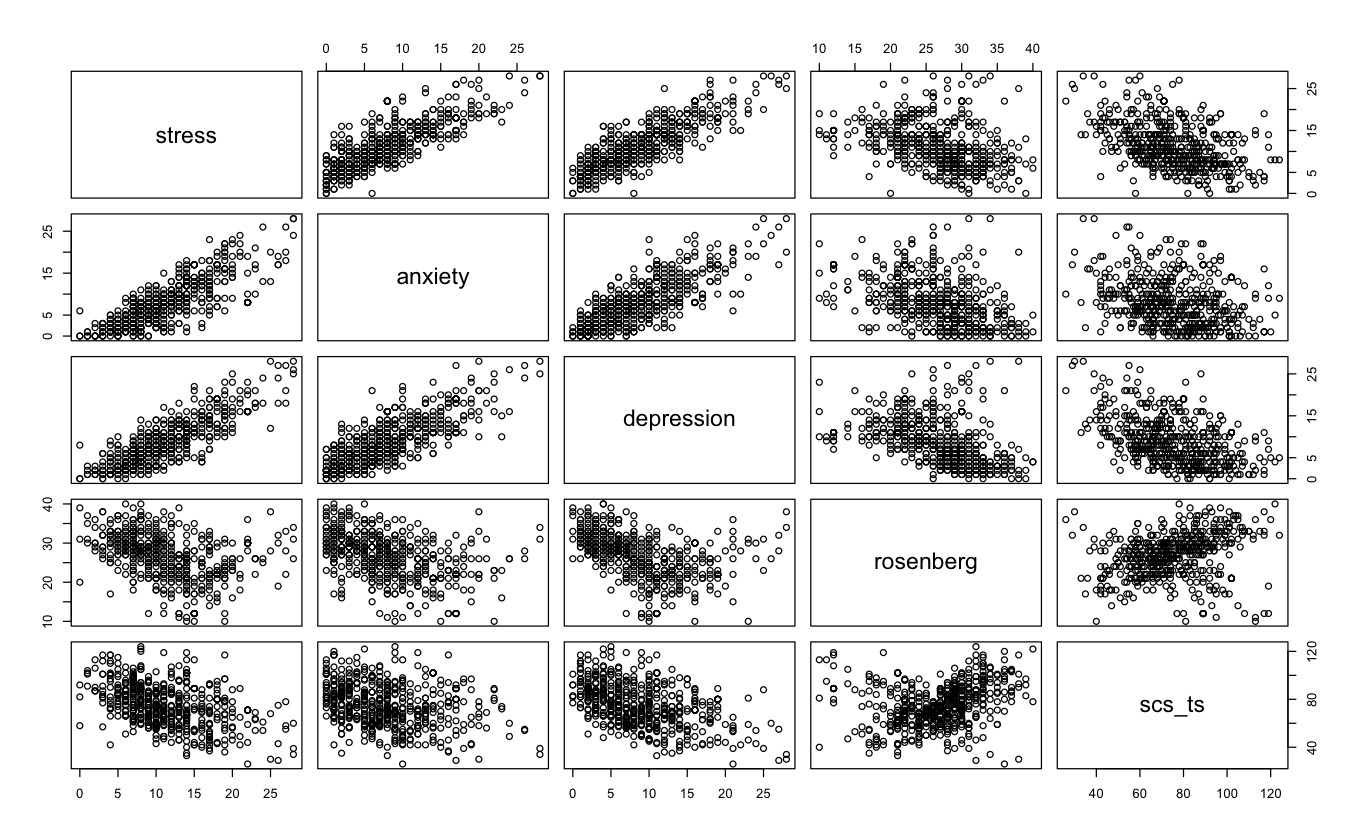

In [4]:
d_mr <- dat |>
    dplyr::select(stress, anxiety, depression, rosenberg, scs_ts)

pairs(d_mr)

In [5]:
y <- d_mr$scs_ts |> as.matrix()
dim(y)

[1] 526   1

### Modello di Regressione Multipla

Il modello generale di regressione lineare multipla (MLR) può essere espresso tramite la seguente equazione:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi} + \epsilon_i 
$$

dove $ i = 1, \ldots, N $ rappresenta l'osservazione $i$-esima, $ \beta_0 $ è il parametro di intercetta, $ \beta_1, \ldots, \beta_p $ sono i coefficienti di regressione, e $ \epsilon_i $ è un termine di errore per la risposta $i$. Inoltre, si assume che il termine di errore sia indipendente da tutte le variabili esplicative (o regressori) $ X_s $.

In questa formulazione, ogni $ y_i $ rappresenta il valore della variabile dipendente per l'osservazione $i$-esima, i $ \beta $ rappresentano i coefficienti che misurano l'impatto di ciascuna variabile esplicativa sulla variabile dipendente, e $ \epsilon_i $ cattura l'errore o la varianza non spiegata nella previsione di $ y_i $. Questa struttura permette di modellare la relazione lineare tra una variabile dipendente e più variabili indipendenti.

Il modello di regressione lineare multipla (MLR) espresso nell'equazione precedente viene spesso rappresentato nella seguente forma matriciale:

$$
y = X\beta + \epsilon 
$$

dove $ y $ è un vettore $ N \times 1 $ della variabile di risposta osservata, $ X $ è una matrice di progettazione (o design matrix) $ N \times (p+1) $ che include tutte le $ p $ variabili esplicative, con la prima colonna composta da 1 che rappresenta l'intercetta (cioè, $ \beta_0 $), $ \beta = (\beta_0, \beta_1, \ldots, \beta_p) $ è un vettore di $ (p+1) $ parametri di regressione, e $ \epsilon $ è il termine di errore. Specificamente, la matrice $ X $ e i vettori $ y $ e $ \epsilon $ sono definiti come segue:

$$
y = 
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}, \quad
\epsilon = 
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_N
\end{pmatrix}, \quad
X = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{p1} \\
1 & x_{12} & \cdots & x_{p2} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{1N} & \cdots & x_{pN}
\end{pmatrix} 
$$

In questa rappresentazione, ogni riga della matrice $ X $ corrisponde a un'osservazione e contiene i valori delle variabili esplicative per quell'osservazione, con una colonna aggiuntiva di 1 per l'intercetta. Il modello in forma matriciale consente un calcolo più efficiente dei parametri di regressione e una gestione più diretta delle relazioni tra variabili multiple.

### Metodo dei Minimi Quadrati

Fondamentalmente, stimando il parametro $ \beta $, cerchiamo di trovare valori (cioè, stime) per gli elementi in $ \beta $ in modo tale che la componente sistematica (cioè, $ X\beta $) spieghi quanto più possibile la variazione nella risposta (cioè, $ y $). In un certo senso, si tratta di trovare valori dei parametri che rendano l'errore il più piccolo possibile. In statistica, questo viene definito come stima dei minimi quadrati, cioè trovare $ \beta $ in modo che la somma degli errori al quadrato sia il più piccola possibile. Matematicamente, la stima dei minimi quadrati (LSE) di $ \beta $, indicata con $ \hat{\beta} $, si ottiene minimizzando la somma degli errori al quadrato (SSE):

$$
\text{SSE} = \epsilon_i^2 = \epsilon' \epsilon = (y - X\beta)'(y - X\beta) = y'y - 2\beta X'y + \beta'X'X\beta
$$

Prendendo la derivata della somma degli errori al quadrato (SSE) rispetto a $ \beta $ e impostandola a zero, si ottiene:

$$
X'X\hat{\beta} = X'y \quad (1.5)
$$

Se $ X'X $ è invertibile, allora abbiamo:

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

In pratica, questo processo di minimizzazione degli errori al quadrato è fondamentale per la stima dei coefficienti nel modello di regressione lineare multipla. Lo scopo è di identificare i valori dei parametri che meglio descrivono la relazione tra le variabili indipendenti e la variabile dipendente, riducendo al minimo la discrepanza tra i valori osservati e quelli previsti dal modello.

Esaminiamo questi calcoli nel caso dei dati in considerazione.

In [6]:
dass <- d_mr |>
    dplyr::select(depression, anxiety, stress)

In [7]:
X <- model.matrix(~ depression + anxiety + stress, data = dass)
head(X)

,(Intercept),depression,anxiety,stress
1,1,4,6,7
2,1,1,2,3
3,1,1,0,1
4,1,13,11,12
5,1,12,6,10
6,1,2,1,5


In [8]:
beta <- solve(t(X) %*% X) %*% t(X) %*% y
print(beta)

                  [,1]
(Intercept) 91.3611064
depression  -1.4841573
anxiety      1.0493140
stress      -0.9733368


Verifichiamo i calcoli eseguiti usando la funzione `lm()`:

In [9]:
fm <- lm(scs_ts ~ depression + anxiety + stress, data = d_mr)
print(coef(fm))

(Intercept)  depression     anxiety      stress 
 91.3611064  -1.4841573   1.0493140  -0.9733368 


I valori predetti sono calcolati come:

In [10]:
yhat <- X %*% beta
cor(yhat, fm$fitted.values) |> print()

     [,1]
[1,]    1


I residui si ottengono nel modo seguente:

In [11]:
e <- d_mr$scs_ts - yhat
cor(e, fm$res) |> print()

     [,1]
[1,]    1


La somma dei quadrati dei residui (Residual Sum of Squares, RSS) è definita nel modo seguente:

In [12]:
RSS <- t(e) %*% e

La stima della varianza dei residui è data da:

In [13]:
var_e <- RSS / (length(y) - dim(X)[2])

dove al denominatore abbiamo i gradi di libertà.

L'errore standard della regressione è dunque dato da:

In [14]:
sqrt(var_e) |> print()

         [,1]
[1,] 15.70196


Verifichiamo:

In [15]:
summary(fm)


Call:
lm(formula = scs_ts ~ depression + anxiety + stress, data = d_mr)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.803 -12.000  -0.348  10.739  43.669 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  91.3611     1.6231  56.288  < 2e-16 ***
depression   -1.4842     0.2376  -6.247 8.69e-10 ***
anxiety       1.0493     0.2103   4.990 8.22e-07 ***
stress       -0.9733     0.2553  -3.813 0.000154 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.7 on 522 degrees of freedom
Multiple R-squared:  0.247,	Adjusted R-squared:  0.2426 
F-statistic: 57.06 on 3 and 522 DF,  p-value: < 2.2e-16


Infine, il coefficiente di determinazione nel modello di regressione multipla ha la stessa definizione di quello incontrato nella regressione bivariata:

In [16]:
R2 <- (sum((yhat - mean(y))^2)) / (sum((y - mean(y))^2)) 
R2

[1] 0.2469619

### Modello di Percorso

Formuliamo ora il modello di regressione multipla nei termini della path analysis.

In [17]:
mod_mr <- "
  scs_ts ~ anxiety + depression + stress
"

Adattiamo il modello ai dati usando `lavaan`:

In [18]:
fit_mr <- lavaan::sem(mod_mr, d_mr)

Esaminiamo i parametri ottenuti in questo modo:

In [19]:
parameterEstimates(fit_mr) |> print()

          lhs op        rhs     est     se      z pvalue ci.lower ci.upper
1      scs_ts  ~    anxiety   1.049  0.209  5.010      0    0.639    1.460
2      scs_ts  ~ depression  -1.484  0.237 -6.271      0   -1.948   -1.020
3      scs_ts  ~     stress  -0.973  0.254 -3.827      0   -1.472   -0.475
4      scs_ts ~~     scs_ts 244.677 15.087 16.217      0  215.106  274.247
5     anxiety ~~    anxiety  32.082  0.000     NA     NA   32.082   32.082
6     anxiety ~~ depression  24.546  0.000     NA     NA   24.546   24.546
7     anxiety ~~     stress  24.538  0.000     NA     NA   24.538   24.538
8  depression ~~ depression  31.418  0.000     NA     NA   31.418   31.418
9  depression ~~     stress  25.662  0.000     NA     NA   25.662   25.662
10     stress ~~     stress  29.714  0.000     NA     NA   29.714   29.714


Si noti che i parametri stimati in questo modo sono praticamente identici a quelli trovati con il metodo della massima verosimiglianza.

### Path Analysis e Scomposizione della Covarianza

L'obiettivo principale dei modelli SEM (Structural Equation Modeling) è quello di identificare coefficienti di percorso che permettano di ricostruire le covarianze osservate nel modello. Questo viene fatto attraverso la somma degli effetti diretti e indiretti, come specificato dal modello. Per esemplificare, consideriamo la covarianza tra il punteggio totale di self-compassion e il livello di ansia, come indicato dal DASS-21.

In questo contesto, l'effetto diretto si riferisce alla relazione diretta tra ansia e auto-compassione. Tuttavia, ci sono anche effetti indiretti che contribuiscono a questa relazione. Uno di questi effetti indiretti proviene dalla covarianza tra ansia e depressione, combinata con l'influenza della depressione sull'auto-compassione. Un altro effetto indiretto deriva dalla covarianza tra ansia e stress, combinata con l'effetto dello stress sull'auto-compassione.

In sostanza, nel modello SEM, la covarianza totale tra self-compassion e ansia è quindi una funzione:
1. Dell'effetto diretto dell'ansia sull'auto-compassione.
2. Dell'effetto combinato di ansia e depressione sull'auto-compassione.
3. Dell'effetto combinato di ansia e stress sull'auto-compassione.

Questi effetti vengono calcolati e sommati per fornire una stima complessiva della covarianza tra i due costrutti, offrendo una visione più olistica e dettagliata delle dinamiche psicologiche in gioco.

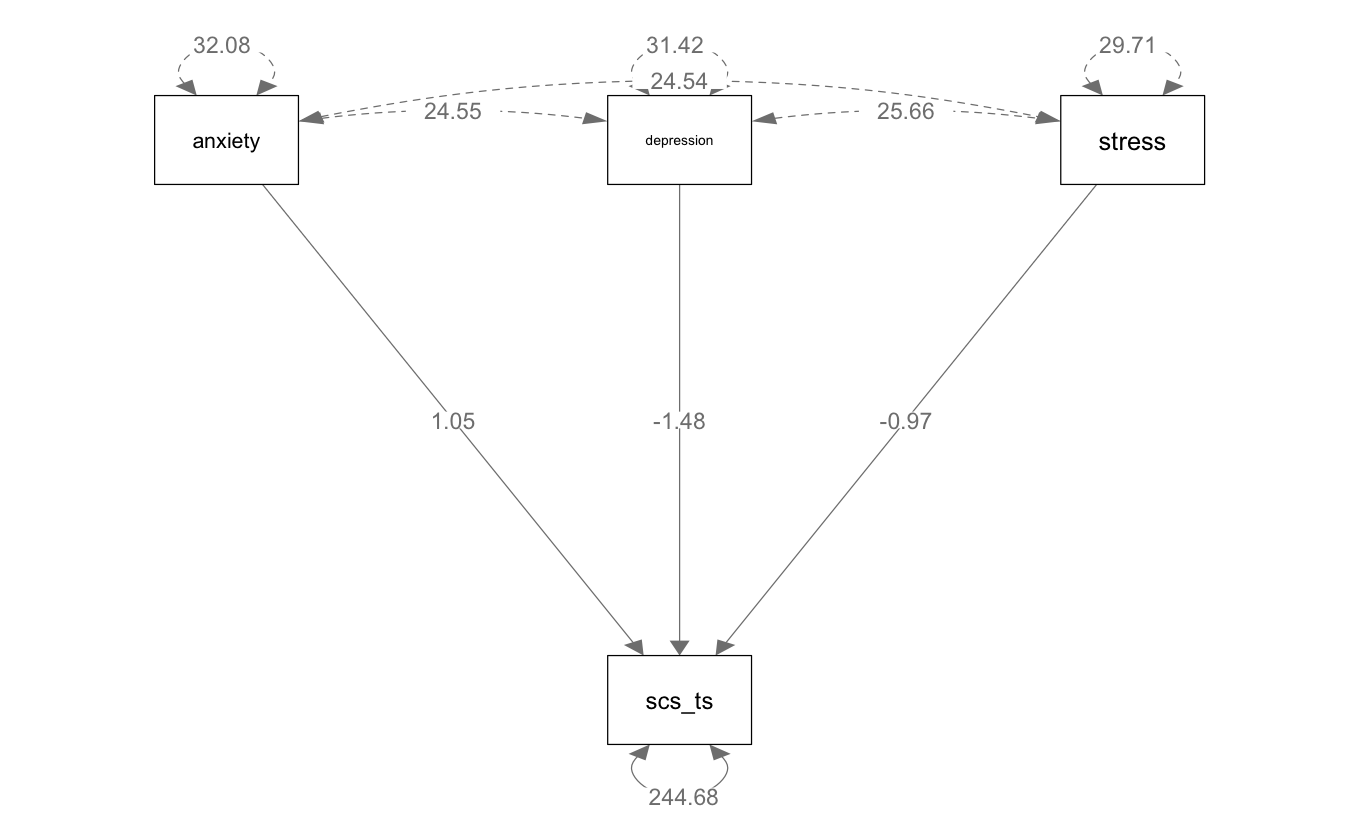

In [20]:
semPaths(fit_mr,
    whatLabels = "est",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "mx",
    nCharNodes = 0, nCharEdges = 0
)

In [21]:
# Coefficients from the model
beta_anxiety_scs_ts <- 1.0493140 # Coefficient for anxiety predicting scs_ts
beta_depression_scs_ts <- -1.4841573 # Coefficient for depression predicting scs_ts
beta_stress_scs_ts <- -0.9733368 # Coefficient for stress predicting scs_ts

# Covariances from the model
cov_anxiety_depression <- 24.5464225
cov_anxiety_stress <- 24.5381096
cov_depression_stress <- 25.6615608

# Assuming the variances of anxiety, depression, and stress
var_anxiety <- 32.0817418
var_depression <- 31.4182365
var_stress <- 29.7137880

# Predicted covariance between anxiety and scs_ts
predicted_cov_anxiety_scs_ts <- 
    beta_anxiety_scs_ts * var_anxiety +
    beta_depression_scs_ts * cov_anxiety_depression +
    beta_stress_scs_ts * cov_anxiety_stress

# Output the predicted covariance
print(predicted_cov_anxiety_scs_ts)


[1] -26.65078


Verifichiamo:

In [22]:
cov(d_mr$anxiety, d_mr$scs_ts)

[1] -26.70154

Lo stesso procedimento si usa per le altre componenti della matrice di varianza/covarianza dei dati.

## Errore di Specificazione

Spiritosamente chiamato "heartbreak of L.O.V.E." [Left-Out Variable Error; {cite:t}`mauro1990understanding`], l'errore di specificazione è una caratteristica fondamentale dei modelli di regressione che deve sempre essere tenuta a mente quando interpretiamo i risultati di questa tecnica di analisi statistica. 

L'errore di specificazione si verifica quando escludiamo dal modello di regressione una variabile che ha due caratteristiche:

- è associata con altre variabili inserite nel modello,
- ha un effetto diretto sulla $y$.

Come conseguenza dell'errore di specificazione, l'intensità e il segno dei coefficienti parziali di regressione risultano sistematicamente distorti.

Consideriamo un esempio con dati simulati nei quali immaginiamo che la prestazione sia positivamente associata alla motivazione e negativamente associata all'ansia. Immaginiamo inoltre che vi sia una correlazione positiva tra ansia a motivazione. Ci chiediamo cosa succede al coefficiente parziale della variabile "motivazione" se la variabile "ansia" viene esclusa dal modello di regressione.

In [23]:
set.seed(123)
n <- 400
anxiety <- rnorm(n, 10, 1.5)
motivation <- 4.0 * anxiety + rnorm(n, 0, 3.5)
cor(anxiety, motivation)

[1] 0.8617706

Creiamo la variabile `performance` come una combinazione lineare di motivazione e ansia nella quale la motivazione ha un effetto piccolo, ma positivo, sulla prestazione, e l'ansia ha un grande effetto negativo sulla prestazione:

In [24]:
performance <-  0.5 * motivation - 5.0 * anxiety + rnorm(n, 0, 3)

Salviamo i dati in un data frame:

In [25]:
sim_dat2 <- tibble(performance, motivation, anxiety)
sim_dat2 |>
    head()

performance,motivation,anxiety
<dbl>,<dbl>,<dbl>
-26.53773,36.37970,9.159287
-32.98337,34.52866,9.654734
-35.55939,47.13063,12.338062
-26.90895,40.32210,10.105763
-28.57925,43.12316,10.193932
-40.17393,44.51348,12.572597


Eseguiamo l'analisi di regressione specificando il modello in maniera corretta, ovvero usando come predittori l'ansia e la depressione:

In [26]:
fm1 <- lm(performance ~ motivation + anxiety, sim_dat2)

Le stime dei coefficienti parziali di regressione recuperano correttamente l'intensità e il segno dei coefficienti utilizzati nel modello generatore dei dati:

In [27]:
print(coef(fm1))

(Intercept)  motivation     anxiety 
  1.3711965   0.4953886  -5.1052176 


Eseguiamo ora l'analisi di regressione ignorando il predittore `anxiety` che ha le due caratteristiche di essere associato a `motivation` e di avere un effetto diretto sulla prestazione:

In [28]:
fm2 <- lm(performance ~ motivation, sim_dat2)
summary(fm2) 


Call:
lm(formula = performance ~ motivation, data = sim_dat2)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.501  -3.409   0.005   3.311  12.616 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.39720    1.44591  -8.574 2.24e-16 ***
motivation   -0.43717    0.03553 -12.305  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.866 on 398 degrees of freedom
Multiple R-squared:  0.2756,	Adjusted R-squared:  0.2738 
F-statistic: 151.4 on 1 and 398 DF,  p-value: < 2.2e-16


Si noti che il risultato prodotto dal modello di regressione è totalmente sbagliato: come conseguenza dell'errore di specificazione, il segno del coefficiente parziale di regressione della variabile "motivazione" è negativo, anche se nel modello generatore dei dati tale coefficiente aveva il segno opposto. 

Quindi, se interpretassimo il coefficiente parziale ottenuto in termini casuali, saremmo portati a concludere che la motivazione fa diminuire la prestazione. Ma in realtà è vero l'opposto.

È facile vedere perché si verifica l'errore di specificazione. Supponiamo che il vero modello sia

$$
y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

il quale verrebbe stimato da

$$
y = a + b_1 X_1 + b_2 X_2 + e.
$$

Supponiamo però che il ricercatore creda invece che

$$
y = \alpha^\prime + \beta_1^\prime X_1 + \varepsilon^\prime
$$

e quindi stimi

$$
y = a^\prime + b_1^\prime X_1 + e^\prime
$$

omettendo $X_2$ dal modello. 

Per capire che relazione intercorre tra $b_1^\prime$ e $b_1$, iniziamo a scrivere la formula per $b_1^\prime$:

$$
\begin{equation}
b_1^\prime = \frac{Cov(X_1, Y)}{Var(X_1)}.
\end{equation}
$$

Sviluppando, otteniamo

$$
\begin{equation}
\begin{aligned}
b_1^\prime &= \frac{Cov(X_1, a + b_1 X_1 + b_2 X_2 + e)}{Var(X_1)}\notag\\
&= \frac{Cov(X_1, a)+b_1 Cov(X_1, X_1) + b_2 Cov(X_1, X_2) + Cov(X_1, e)}{Var(X_1)}\notag\\
&= \frac{0 + b_1 Var(X_1) + b_2 Cov(X_1, X_2) + 0}{Var(X_1)}\notag\\
&= b_1 + b_2 \frac{Cov(X_1, X_2)}{Var(X_1)}.
\end{aligned}
\end{equation}
$$

Quindi, se erroneamente omettiamo $X_2$ dal modello, abbiamo che

$$
\begin{equation}
\mathbb{E}(b_1^\prime) = \beta_1 + \beta_2 \frac{\sigma_{12}}{\sigma_1^2}.
\end{equation}
$$(eq-specific-err)

Verifichiamo tale conclusione per i dati dell'esempio che stiamo discutendo. Nel caso presente, $X_1$ è `motivation` e $X_2$ è `anxiety`. Applicando l'eq. {eq}`eq-specific-err` otteniamo lo stesso valore per il coefficiente di regressione associato a `motivation` che era stato ottenuto adattando ai dati il modello `performance ~ motivation`:

In [29]:
fm1$coef[2] +  fm1$coef[3] * 
  cov(sim_dat2$motivation, sim_dat2$anxiety) / 
  var(sim_dat2$motivation)

motivation 
-0.4371675

Possiamo dunque concludere che $b_1^\prime$ è uno stimatore distorto di $\beta_1$. Si noti che questa distorsione non scompare all'aumentare della numerosità campionaria, il che (in termini statistici) significa che un tale stimatore è _inconsistente_. Quello che succede in pratica è che alla variabile $X_1$ vengono attribuiti gli effetti delle variabili che sono state omesse dal modello. Si noti che una tale distorsione sistematica di $b_1^\prime$ può essere evitata solo se si verificano due condizioni:

- $\beta_2 = 0$. Questo è ovvio, dato che, se $\beta_2 = 0$, ciò significa che il modello non è specificato in modo errato, cioè $X_2$ non appartiene al modello perché non ha un effetto diretto sulla $Y$.
-  $\sigma_{12} = 0$. Cioè, se $X_1$ e $X_2$ sono incorrelate, allora l'omissione di una delle due variabili non comporta stime distorte dell'effetto dell'altra.

### Soppressione

Le conseguenze dell'errore di specificazione sono chiamate "soppressione" (_suppression_). In generale, si ha soppressione quando (1) il valore assoluto del peso beta di un predittore è maggiore di quello della sua correlazione bivariata con il criterio o (2) i due hanno segni opposti. 

- L'esempio descritto sopra è un caso di _soppressione negativa_, dove il predittore ha correlazioni bivariate positive con il criterio, ma si riceve un peso beta negativo nell'analisi di regressione multipla. 
- Un secondo tipo di soppressione è la _soppressione classica_, in cui un predittore non è correlato al criterio ma riceve un peso beta diverso da zero. 
- C'è anche la _soppressione reciproca_ che può verificarsi quando due variabili sono correlate positivamente con il criterio ma negativamente tra loro.

### Regressione Stepwise

Nel contesto della regressione, è importante comprendere che i predittori non dovrebbero essere selezionati basandosi unicamente sulle loro correlazioni bivariate con la variabile dipendente (il criterio). Queste correlazioni, note come associazioni di "ordine zero", non tengono conto dell'influenza degli altri predittori. Di conseguenza, i valori delle correlazioni bivariate possono risultare fuorvianti quando si considerano i coefficienti di regressione parziale per le stesse variabili.

La significatività statistica delle correlazioni bivariate con la variabile dipendente non è un criterio affidabile per la selezione dei predittori. Questo perché tali correlazioni non considerano gli effetti complessivi degli altri predittori nel modello.

Le procedure di selezione automatica dei predittori, come quelle impiegate nelle regressioni stepwise, possono essere seducenti per la loro facilità d'uso. Tuttavia, queste procedure sono rischiose. Anche piccole non-linearità o effetti indiretti tra i predittori, che potrebbero non essere immediatamente evidenti, possono distorcere in modo significativo i coefficienti di regressione parziale. 

Invece di affidarsi a metodi automatici, è preferibile selezionare un numero limitato di predittori basandosi su considerazioni teoriche o sui risultati di ricerche precedenti. Questo approccio più ponderato aiuta a evitare le distorsioni che possono emergere dall'uso di procedure di selezione automatica.

Una volta che sono stati selezionati, i predittori possono essere inseriti nell'equazione di regressione in due modi diversi: 

- tutti i predittori possono essere inseriti nel modello contemporaneamente;
- i predittori possono essere inseriti nel modello sequenzialmente, mediante una serie di passaggi. 

L'ordine di ingresso può essere determinato in base a standard: teorici (razionali) o empirici (statistici). Lo standard razionale corrisponde alla *regressione gerarchica*, in cui si comunica al computer un ordine fisso per inserire i predittori. Ad esempio, a volte le variabili demografiche vengono inserite nel primo passaggio, quindi nel secondo passaggio viene inserita una variabile psicologica di interesse. Questo ordine non solo controlla le variabili demografiche ma permette anche di valutare il potere predittivo della variabile psicologica, al di là di quello delle semplici variabili demografiche. Quest'ultimo può essere stimato come l'aumento della correlazione multipla al quadrato, o $\Delta R^2$, da quella della fase 1 con solo predittori demografici a quella della fase 2 con tutti i predittori nell'equazione di regressione.

Un esempio di standard statistico è la regressione _stepwise_, in cui il computer seleziona l'inserimento dei predittori in base esclusivamente alla significatività statistica; cioè, viene chiesto: quale predittore, se inserito nell'equazione, avrebbe il valore_$p$ più piccolo per il test del suo coefficiente di regressione parziale? Dopo la selezione, i predittori in una fase successiva possono essere rimossi dall'equazione di regressione in base ai loro valori-$p$ (ad esempio, se $p \geq$ .05). Il processo stepwise si interrompe quando, aggiungendo più predittori, $\Delta R^2$ non migliora. Varianti della regressione stepwise includono _forward inclusion_, in cui i predittori selezionati non vengono successivamente rimossi dal modello, e _backward elimination_, che inizia con tutti i predittori nel modello per poi rimuoverne alcuni in passi successivi. Per le ragioni descritte nel paragrafo sull'errore di specificazione, i metodi basati sulle procedure di stepwise regression non dovrebbero mai essere usati. Infatti, i problemi relativi a tale procedura sono così gravi che varie riviste non accettano studi che fanno uso di una tale tecnica statistica. I risultati ottenuti con tali metodi, infatti, sono quasi certamente non replicabili in campioni diversi.

Una considerazione finale riguarda l'idea di rimuovere i predittori "non significativi" dal modello di regressione. Questa è una cattiva idea. Il ricercatore non deve sentirsi in dovere di trascurare quei predittore che non risultano "statisticamente significativi". In campioni piccoli, la potenza dei test di significatività è  bassa e la rimozione di un predittore non significativo può alterare sostanzialmente la soluzione. Se c'è una buona ragione per includere un predittore, allora è meglio lasciarlo nel modello, fino a prova contraria. In termini generali, qualsiasi considerazione basata sulla "significatività statistia" è fuorviante.

## Oltre la Regressione Multipla

Approfondiamo l'esempio che utilizza il modello SEM per esaminare la relazione tra autocompassione e malessere psicologico, come misurato dalle sotto-scale della DASS-21 (Depressione, Ansia, Stress) e della Self-Compassion Scale. In questo contesto, sviluppiamo due variabili latenti: 'malessere psicologico' e 'autocompassione'. La variabile latente 'malessere psicologico' è costruita dalle tre sotto-scale della DASS-21, mentre 'autocompassione' è derivata dalle sei sotto-scale della Self-Compassion Scale.

La relazione tra queste variabili latenti è esplorata mediante un modello strutturale. In questo modello, l'autocompassione è trattata come una variabile esogena, che si ipotizza agisca come fattore di protezione, riducendo il malessere psicologico (variabile endogena). L'ipotesi è che vi sia una relazione di regressione negativa tra autocompassione e malessere psicologico, suggerendo che livelli più alti di autocompassione sono associati a livelli più bassi di malessere psicologico.

Un aspetto cruciale del modello SEM è il trattamento dell'errore di misurazione. Le variabili latenti sono costruite per catturare la vera essenza dei costrutti teorici (autocompassione e malessere psicologico in questo caso) al di là degli errori di misurazione presenti negli indicatori osservati (le sotto-scale). Questo significa che quando esploriamo la relazione tra autocompassione e malessere psicologico, lo facciamo considerando la 'vera' relazione tra questi costrutti, purificata dagli errori di misurazione che possono essere presenti nelle misure osservate.

La capacità del modello SEM di distinguere tra la variabilità dovuta ai costrutti latenti e quella dovuta all'errore di misurazione rende l'analisi più accurata e affidabile. Ciò è particolarmente importante in psicologia, dove i costrutti teorici non sono direttamente osservabili e devono essere inferiti da misure soggette a errore. 

In [30]:
mod_sc <- "
  F =~ anxiety + depression + stress
  SC =~ self_kindness	+ common_humanity	+ mindfulness	+ self_judgment	+ isolation	+ over_identification
  F ~ SC 
"

Adattiamo il modello ai dati.

In [31]:
fit_sc <- lavaan::sem(mod_sc, dat)

Esaminiamo la soluzione ottenuta.

In [32]:
standardizedSolution(fit_sc) |> print()

                   lhs op                 rhs est.std    se       z pvalue
1                    F =~             anxiety   0.847 0.014  58.505      0
2                    F =~          depression   0.909 0.011  82.503      0
3                    F =~              stress   0.929 0.010  91.945      0
4                   SC =~       self_kindness   0.757 0.022  33.984      0
5                   SC =~     common_humanity   0.621 0.030  20.695      0
6                   SC =~         mindfulness   0.689 0.026  26.235      0
7                   SC =~       self_judgment  -0.770 0.022 -35.800      0
8                   SC =~           isolation  -0.770 0.022 -35.822      0
9                   SC =~ over_identification  -0.767 0.022 -35.416      0
10                   F  ~                  SC  -0.476 0.038 -12.385      0
11             anxiety ~~             anxiety   0.282 0.025  11.495      0
12          depression ~~          depression   0.173 0.020   8.633      0
13              stress ~~

1. **Saturazioni Fattoriali (Loadings) per le Variabili Latenti:**
   - **F:** Le variabili osservate "anxiety", "depression", e "stress" hanno elevate saturazioni fattoriali sulla variabile latente "F". Questo suggerisce che ciascuna di queste misure è un buon indicatore della variabile latente "F".
   - **SC:** Le variabili "self_kindness", "common_humanity", "mindfulness", "self_judgment", "isolation", e "over_identification" hanno anch'esse significative saturazioni sulla variabile latente "SC". Si noti che "self_judgment", "isolation", e "over_identification" hanno saturazioni negative, indicando che queste variabili sono inversamente associate con "SC".

2. **Regressione tra Variabili Latenti:**
   - La relazione di regressione tra "F" e "SC" mostra un coefficiente negativo (-0.48), il che indica una relazione inversa tra queste due variabili latenti. Questo significa che livelli più alti di "SC" sono associati a livelli più bassi di "F".

3. **Varianza delle Variabili Latenti:**
   - La varianza di "F" e "SC" indica quanto della variazione nelle variabili latenti è spiegata dai loro rispettivi indicatori. La varianza di "F" (0.77) è relativamente alta, suggerendo che gli indicatori spiegano una buona parte della varianza in "F". La varianza di "SC" è fissata a 1, un approccio comune per identificare il modello.

4. **Varianze Residue degli Indicatori:**
   - Le varianze residue (ad esempio, "anxiety ~~ anxiety") rappresentano la varianza non spiegata in ciascun indicatore dalle variabili latenti. Valori più bassi indicano che la variabile latente spiega una maggior parte della varianza dell'indicatore. Ad esempio, "anxiety" ha una varianza residua di 0.28, suggerendo che "F" spiega una buona parte, ma non tutta, della varianza in "anxiety".

Generiamo una rappresentazione grafica del modello.

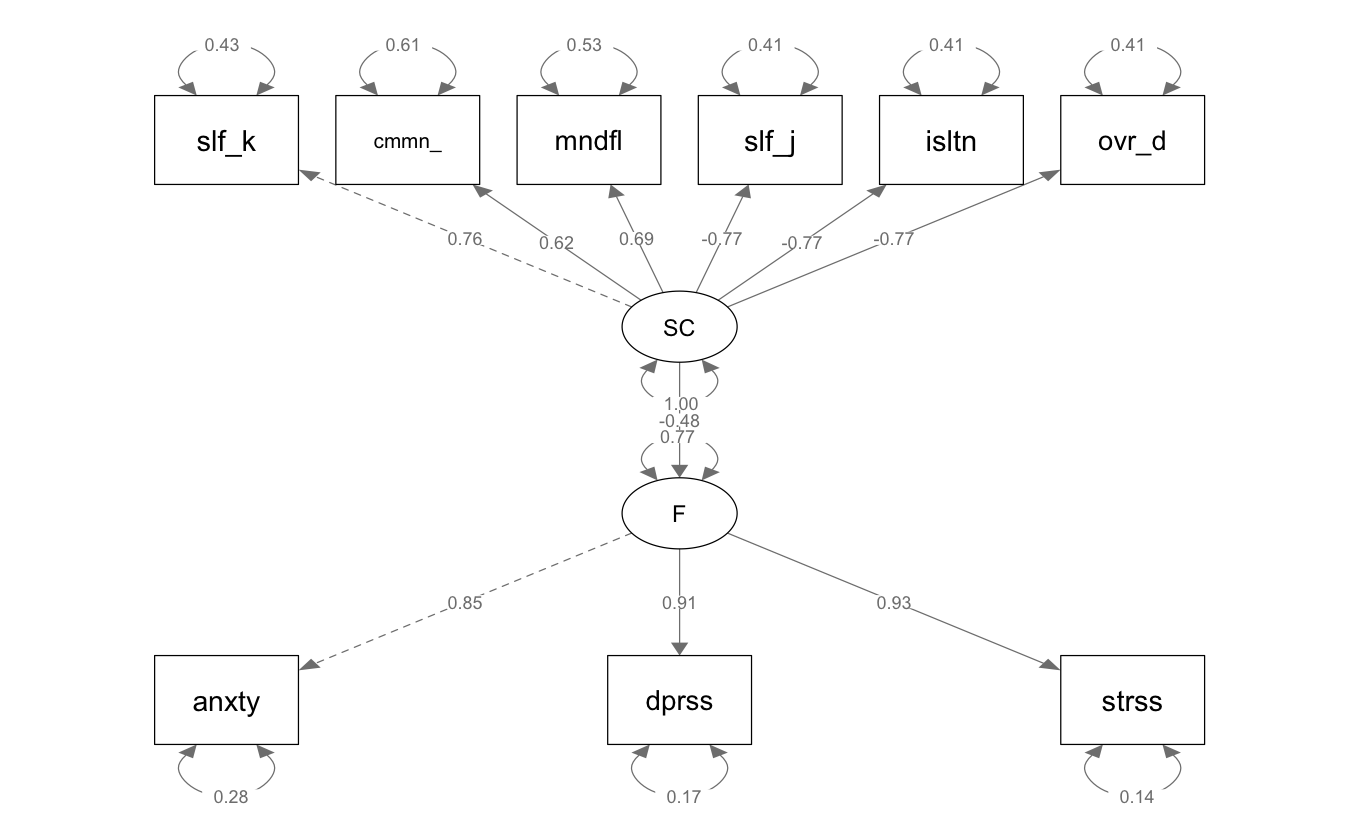

In [33]:
semPaths(fit_sc,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "mx",
    nCharNodes = 5, nCharEdges = 0, 
    fade=FALSE
)

I coefficienti stimati nel modello SEM appaiono coerenti e in linea con le aspettative, in particolare il coefficiente che descrive l'effetto "causale" del fattore dell'autocompassione sul malessere psicologico, che si attesta a -0.48. Questo valore negativo corrobora l'ipotesi secondo cui l'autocompassione svolge un ruolo di fattore protettivo contro il malessere psicologico. Tuttavia, prima di confermare definitivamente questa conclusione, è cruciale esaminare gli indici di bontà di adattamento del modello. Questi indici ci permetteranno di valutare quanto accuratamente il modello SEM si adatta ai dati osservati, fornendo un quadro più chiaro della validità delle nostre inferenze. In altre parole, sebbene il modello suggerisca una relazione negativa tra autocompassione e malessere psicologico, la conferma finale di questa associazione dipenderà dall'adeguatezza complessiva del modello rispetto ai dati. Questo argomento verrà affrontato nel prossimo capitolo.

## Impiego delle Medie nei Modelli SEM 

Nei modelli SEM, similmente all'analisi fattoriale, poniamo enfasi sull'analisi delle covarianze tra le variabili. Tuttavia, a differenza dell'analisi fattoriale, i modelli SEM permettono anche di includere le medie delle variabili osservate e latenti. Le medie forniscono informazioni molto utili in molti modelli SEM, come ad esempio nei modelli CFA longitudinali. In alcuni di questi modelli, le ipotesi chiave riguardano le medie dei costrutti.

L'equazione generale per le strutture medie è:

$$ 
E(y) = \mu_y = T + \Lambda A 
$$ (eq-mean-structure-cfa)

dove:

- $ y $ rappresenta i punteggi sugli indicatori.
- $ E(y) $ è l'aspettativa (ovvero, la media) di $ y $.
- $ \mu_y $ è il vettore delle medie implicite dal modello degli indicatori $ y $. È l'analogia per le strutture medie di $ \Sigma $.
- $ \Lambda $ è la matrice dei carichi o delle stime delle relazioni degli indicatori con i costrutti.
- $ T $ è il vettore colonna delle medie degli indicatori.
- $ A $ è un vettore colonna delle medie dei costrutti latenti.

In un diagramma a percorsi, un triangolo con il numero 1 viene utilizzato per includere la costante di regressione in una rappresentazione grafica. Questo simbolo rappresenta la costante del vettore colonna (intercetta) che viene utilizzata per stimare una media quando una variabile viene regredita su di essa: la colonna di 1.0 rappresenta l'intercetta di un'equazione di regressione.

La media di ciascun indicatore è stimata nel vettore tau, $ \tau $, una singola colonna di medie con una elemento per riga per ciascun indicatore in un dato modello. La matrice $ \Lambda $ è la matrice di saturazioni fattoriali del modello di misurazione CFA. Poiché i carichi sono inclusi nell'Eq. {eq}`eq-mean-structure-cfa`, il modello delle strutture delle medie è intrinsecamente collegato al modello delle strutture di covarianza. L'intensità con cui un indicatore satura su un costrutto influenza il modo in cui stimiamo la media latente, in particolare quando gli indicatori sono congenerici. Ciò significa che gli indicatori con carichi più forti contribuiscono maggiormente a determinare il livello medio del costrutto rispetto a quelli con carichi più bassi. La lettera greca alfa, $ \alpha $, è utilizzata per rappresentare le medie stimate dei costrutti latenti. Quando sviluppo le equazioni individuali, la lettera greca minuscola tau, $ \tau $, è utilizzata per rappresentare la media degli indicatori, e la lettera greca minuscola alfa, $ \alpha $, è utilizzata per rappresentare la media del fattore latente. 

Come nella dimensione delle strutture di covarianza dei modelli SEM, dove è necessario un vincolo per stabilire la scala, anche nella componente delle strutture medie si richiede un vincolo simile. Per le medie, lo zero è adottato come punto fisso di scalatura. La scelta dello zero, piuttosto che di un valore non nullo come avviene nella parte di covarianza del modello, si basa sul fatto che le medie vengono calcolate come distanze dallo zero, che possono essere sia positive sia negative. Stabilire un vincolo per la scalatura delle medie comporta la definizione precisa della posizione dello zero, consentendo così il calcolo delle distanze a partire da questo punto fissato. Nella gestione delle strutture delle medie, in genere, la media del fattore latente viene fissata a zero per stabilire la scala nel caso si adotti il metodo del fattore fisso.

Per stimare le intercette in un modello SEM, è necessario disporre dei dati originali (non elaborati) o di una matrice di covarianza, oltre alle medie di tutte le variabili coinvolte. Inoltre, la definizione del modello SEM tramite il software `lavaan` richiede l'inclusione di specificazioni sia per la struttura di covarianza che per la struttura delle medie.

Il software `lavaan` semplifica questo processo. Ad esempio, utilizzando la sintassi `meanstructure = true` in `lavaan`, si comunica al programma che deve incorporare automaticamente la costante "1" in tutte le equazioni del modello. Questo permette al modello di calcolare le intercette per le variabili endogene. Se necessario, è anche possibile impostare manualmente queste intercette. Per esempio, inserendo `illness ~ 1` nella sintassi, si indica al modello di includere una costante "1" nell'equazione relativa alla variabile "illness" (malattia), consentendo così di stimarne l'intercetta.

In conclusione, la struttura delle medie in un modello SEM è fondamentale per ottenere stime delle medie delle variabili. Queste stime possono essere poi confrontate con le medie osservate nei dati raccolti. Questo approccio è analogo a come la struttura di covarianza nel modello SEM ci permette di confrontare le relazioni tra le variabili nel modello con quelle osservate nei dati.

## Considerazioni Conclusive

In questo capitolo, abbiamo introdotto i Modelli di Equazioni Strutturali (SEM). Abbiamo mostrato come i SEM non solo descrivano le interazioni tra variabili osservabili, ma possono anche essere utilizzati per analizzare relazioni tra variabili latenti. Il punto di forza dei SEM risiede nella loro capacità di fondere il modello di misura, che delinea le relazioni tra gli indicatori e le variabili latenti, con il modello strutturale, che esplora le connessioni tra le variabili latenti stesse.

Nei capitoli successivi, approfondiremo ulteriormente gli aspetti della modellizzazione SEM. Uno dei temi centrali sarà la valutazione della bontà di adattamento del modello, un processo essenziale per determinare quanto accuratamente il modello rappresenti la realtà. Esploreremo inoltre il confronto tra modelli alternativi, un passaggio chiave per identificare il modello che meglio si adatta alla struttura dei dati. Un altro aspetto importante sarà l'analisi dell'adattabilità dei modelli a gruppi diversificati, essenziale per valutare la loro generalizzabilità e specificità. Inoltre, affronteremo le sfide metodologiche poste dalla gestione di dati categoriali, dall'applicazione di modelli SEM multilivello e dal trattamento di dati mancanti.